In [27]:
import pandas as pd
import os
import numpy as np

In [51]:
def read_transducer_csv(path: str):
    return pd.read_csv(path, dtype={'Name': 'category'})

df4 = read_transducer_csv("../data/Transducer_ExpFrame4TrainsNoDelays.log")
df4Delay = read_transducer_csv("../data/Transducer_ExpFrame4TrainsWithDelays.log")
df6 = read_transducer_csv("../data/Transducer_ExpFrame6TrainsNoDelays.log")
df6Delay = read_transducer_csv("../data/Transducer_ExpFrame6TrainsWithDelays.log")
df8 = read_transducer_csv("../data/Transducer_ExpFrame8TrainsNoDelays.log")
df8Delay = read_transducer_csv("../data/Transducer_ExpFrame8TrainsWithDelays.log")
df = df4.copy()
df = df.append(df4Delay)
df = df.append(df6)
df = df.append(df6Delay)
df = df.append(df8)
df = df.append(df8Delay)
levels = ['Transducer_ExpFrame4TrainsNoDelays',
          'Transducer_ExpFrame4TrainsWithDelays',
          'Transducer_ExpFrame6TrainsNoDelays',
          'Transducer_ExpFrame6TrainsWithDelays',
          'Transducer_ExpFrame8TrainsNoDelays',
          'Transducer_ExpFrame8TrainsWithDelays']
new_levels = [r'\thead{4 Trains \\ No Delays}'
             ,r'\thead{4 Trains \\ With Delays}'
             ,r'\thead{6 Trains \\ No Delays}'
             ,r'\thead{6 Trains \\ With Delays}'
             ,r'\thead{8 Trains \\ No Delays}'
             ,r'\thead{8 Trains \\ With Delays}']
df['Name'] = pd.Categorical(df['Name'], categories=levels, ordered=False)
df['Name'].cat.categories = new_levels
df.describe()

,Passengers Carried,Accumulated Load Unload Delays,Average Load Unload Delay,Average Load Unload Nonzero Delay,Total Transit Delay,Average Transit Delay
count,306.000000,306.000000,306.000000,306.000000,306.000000,153.000000
mean,1990.111111,37.392157,0.116096,1.006325,21.852379,1.491327
std,461.370354,20.404029,0.046214,0.212844,23.807444,0.182505
min,1262.000000,3.000000,0.013200,0.416700,0.000000,0.974900
25%,1468.000000,20.000000,0.082800,0.859975,0.000000,1.374500
50%,2008.000000,34.500000,0.115300,1.000000,6.276700,1.488400
75%,2461.000000,51.000000,0.147025,1.142900,43.438650,1.622700
max,2772.000000,92.000000,0.230600,1.800000,83.578100,2.036500


In [52]:
summary = df.groupby(['Name']).agg([np.mean, np.std]).transpose()
summary

Name                                    \thead{4 Trains \\ No Delays}  \
Passengers Carried                mean                    1451.862745   
                                  std                       64.126132   
Accumulated Load Unload Delays    mean                      16.960784   
                                  std                        7.230383   
Average Load Unload Delay         mean                       0.080541   
                                  std                        0.036408   
Average Load Unload Nonzero Delay mean                       1.008747   
                                  std                        0.263860   
Total Transit Delay               mean                       0.000000   
                                  std                        0.000000   
Average Transit Delay             mean                            NaN   
                                  std                             NaN   

Name                                    \thead{4 Trains \\ With Delays}  \
Passengers Carried                mean                      1399.921569   
                                  std                         61.365086   
Accumulated Load Unload Delays    mean                        18.921569   
                                  std                          8.666817   
Average Load Unload Delay         mean                         0.093078   
                                  std                          0.044247   
Average Load Unload Nonzero Delay mean                         1.049345   
                                  std                          0.265212   
Total Transit Delay               mean                        31.395951   
                                  std                          6.553260   
Average Transit Delay             mean                         1.510239   
                                  std                          0.204147   

Name                                    \thead{6 Trains \\ No Delays}  \
Passengers Carried                mean                    2034.549020   
                                  std                       73.127372   
Accumulated Load Unload Delays    mean                      37.137255   
                                  std                       10.405805   
Average Load Unload Delay         mean                       0.119080   
                                  std                        0.035622   
Average Load Unload Nonzero Delay mean                       1.005780   
                                  std                        0.201280   
Total Transit Delay               mean                       0.000000   
                                  std                        0.000000   
Average Transit Delay             mean                            NaN   
                                  std                             NaN   

Name                                    \thead{6 Trains \\ With Delays}  \
Passengers Carried                mean                      1982.392157   
                                  std                         75.265418   
Accumulated Load Unload Delays    mean                        33.098039   
                                  std                         11.527801   
Average Load Unload Delay         mean                         0.109180   
                                  std                          0.040217   
Average Load Unload Nonzero Delay mean                         0.993180   
                                  std                          0.205189   
Total Transit Delay               mean                        43.615176   
                                  std                          9.167675   
Average Transit Delay             mean                         1.491743   
                                  std                          0.200335   

Name                                    \thead{8 Trains \\ No Delays}  \
Passengers Carried                mean                    2581.294118   
  

In [53]:
outfile = '../Report/experiment_result_table.tex'
with open(outfile, 'w') as f:
    f.write(summary.to_latex(float_format='{:,.2f}'.format, longtable=True, escape=False))

In [1]:
import plotSchedulerData as psd
import matplotlib.pyplot as plt
import os
import numpy as np

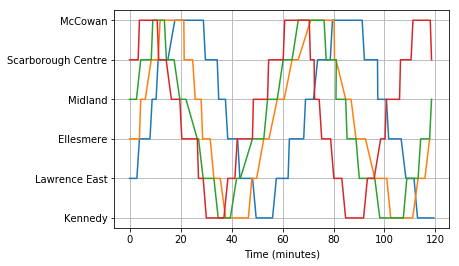

In [2]:
# for path in ['Scheduler_ExpFrame4TrainsNoDelays.log', 'Scheduler_ExpFrame4TrainsWithDelays.log', 
#              'Scheduler_ExpFrame6TrainsNoDelays.log', 'Scheduler_ExpFrame6TrainsWithDelays.log']:
for path in ['Scheduler_ExpFrame4TrainsWithDelays.log']:
    data = np.genfromtxt(os.path.join('../data', path),skip_header=1,dtype=None)
    name, ext = os.path.splitext(path)
    psd.plotSchedule(name, data)